In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def near_cells_F(i,j):
    
    near_cells=[(i,j-1),(i,j+1),(i-1,j),(i+1,j)]
    return near_cells

In [8]:
def run_Experiment(Layer,p,plot, gyration_radius):
    L = 350
    lattice = np.zeros((L,L))
    lattice[int(L/2),int(L/2)] = 1
    nears=near_cells_F(int(L/2),int(L/2))
    r2s= 0
    N = 0
    for layer in range(Layer):
        near_cells = nears
        nears=[]
        for cell in near_cells:
            rand = np.random.random()
            if lattice[cell]==0:
                if rand <p:
                    lattice[cell] = 1
                    r2s += ((cell[0]-int(L/2))**2 + (cell[1]-int(L/2))**2 )
                    N+=1
                    if cell[0]>0 and cell[1]>0 and cell[0]<L-1 and cell[1]<L-1:
                        nears+=(near_cells_F(cell[0], cell[1]))
                    else :
                        break
    
    if plot==1:
        plt.imshow(lattice)
        
    if gyration_radius==1:
        return lattice, (r2s/(N+1))**0.5
    
    return lattice

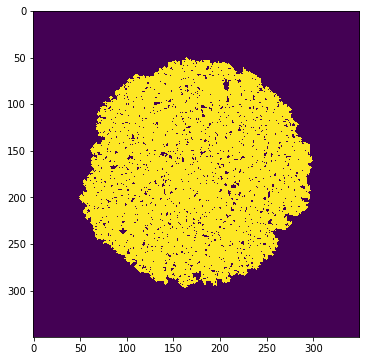

In [58]:
plt.figure(figsize=(6,6))
lattice = run_Experiment(180,0.59,1,0)

# Numeric data

In [52]:
Q = 700
#P = np.arange(0.3,0.75,0.05)
P = [0.59]
data_list = []
for p in P:
    accum=0
    rg=0
    for q in range(Q):
        data = run_Experiment(100,p,0,1)
        accum=data[0].sum()
        rg = data[1]
        data_list.append((rg,accum))
    

In [53]:
data = np.array(data_list)

Text(0, 0.5, 'log(size)')

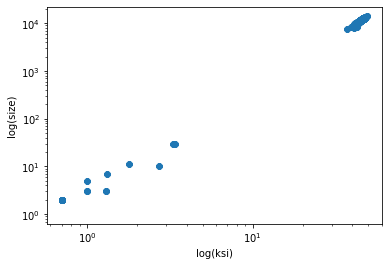

In [57]:

plt.loglog(data[:,0], (data[:,1]),'8')
plt.xlabel('log(ksi)')
plt.ylabel('log(size)')

# Line Fitting 

In [46]:
from scipy import optimize


In [47]:
def fit_function(x,a,b):
    return a*x+b

parameters , covar = optimize.curve_fit(fit_function, np.log(data[:,0]+1), np.log(data[:,1]), p0=[1,2])


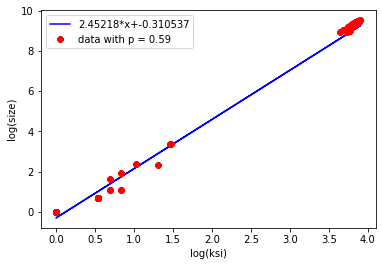

In [59]:
plt.plot(np.log(data[:,0]+1),fit_function(np.log(data[:,0]+1),parameters[0], parameters[1]),'b',
        label='%3.5f*x+%f'%(parameters[0], parameters[1]))
plt.plot(np.log(data[:,0]+1), np.log(data[:,1]),'8r',
        label='data with p = 0.59')
plt.xlabel('log(ksi)')
plt.ylabel('log(size)')
plt.legend()